In [32]:
# Importing Dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [149]:
# Loading Data

Data = pd.read_csv('ClassificationData.txt', header = None)

# Info

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [151]:
Data.head(10)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [152]:
# Preprocessing Data

X = Data.values[:, :2]
y = Data.values[:, 2].reshape((-1,1))

m, n = X.shape

# Adding Bias term

X = np.hstack(( np.ones(shape = (m,1)), X ))

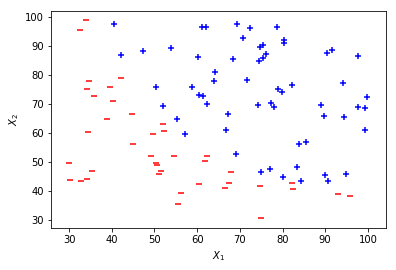

In [153]:
# Visualizing data
for i in range(m):
    if y[i] == 0:
        plt .scatter(X[i, 1], X[i, 2], marker = '_', color = 'r', s = 45)
    else:
        plt.scatter(X[i, 1], X[i, 2], marker = '+', color = 'b', s = 45)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [155]:
# Initializing weights

"""
    X = m x n
    W = n x 1
    b = 1 x 1
    y = m x 1
"""
def rand_init_weights():
    np.random.seed(5)
    W = np.random.rand(n,1)    # Weights / Coefficients
    b = np.random.rand(1,1)    # Intercept term
    Theta = np.vstack((b, W))  # Joining W and b into one single vector for easy calculations
    return Theta

In [156]:
# Defining sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [162]:
## Cost / Risk (Negative log likelihood)

"""
    Using Newton's method, we'll be maximizing the log likelihood of our predictor function
    In other words, we can say that we'll be minimizing the cost/loss/risk of our predictor function
"""

def cost(X, y, Theta):
    m = y.size
    
    z = X @ Theta
    a = sigmoid(z)
    
    J = -(1/m)*np.sum(y * np.log(a) + (1-y) * np.log(1-a))
    
    return J
  
    
## Gradient with respect to Theta

def gradient(X, y, Theta):
    m = y.size
    
    z = X @ Theta
    a = sigmoid(z)
        
    grad = (1/m) * (X.T @ (a-y))
    
    return grad

## Full-Hessian 

def hessian(X, y, Theta):
    m = y.size

    z = X @ Theta
    a = sigmoid(z)
    
    temp = np.diag((a * (1-a))[:,0])
    
    Hess = (1/m) * (X.T @ temp @ X)    

    return Hess

In [164]:
# Training the model using Newton's method

def train(X, y, Theta, tolerance = 1e-10):
    # Tolerance - test for convergence
    
    Jhist = []
    i = 1
    Lambda = 50   # Regularizer factor
    
    while True:
        
        grad = gradient(X, y, Theta)
        Hess = hessian(X, y, Theta)
        
        Theta -= (np.linalg.inv(Hess + Lambda * np.eye(Hess.shape[0])) @ grad)
        
        J = cost(X, y, Theta)
        
        if i != 1 and abs(Jhist[-1] - J) < tolerance:
            print("Iteration:: {} - Cost:: {}".format(i, Jhist[-1]))
            print("Iteration:: {} - Cost:: {}".format(i, J))
            print('converged!!!')
            break
            
        Jhist.append(J)
        
        if i%1000 == 0:
            print("Iteration:: {} - Cost:: {}".format(i, J))
        
        i += 1
        
    return Theta, Jhist

In [165]:
# Splitting dataset into test set and train set

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 3)


In [166]:
## Training our model
Theta = rand_init_weights()

Theta, Jhist = train(Xtrain,ytrain,Theta)

Iteration:: 1000 - Cost:: 0.5621376384569744
Iteration:: 2000 - Cost:: 0.49181197390853626
Iteration:: 3000 - Cost:: 0.442296039608151
Iteration:: 4000 - Cost:: 0.4061148172834849
Iteration:: 5000 - Cost:: 0.37873538890929587
Iteration:: 6000 - Cost:: 0.3573771059578983
Iteration:: 7000 - Cost:: 0.34028297795420487
Iteration:: 8000 - Cost:: 0.32630435177572537
Iteration:: 9000 - Cost:: 0.3146649691539739
Iteration:: 10000 - Cost:: 0.30482405964136144
Iteration:: 11000 - Cost:: 0.29639453175470565
Iteration:: 12000 - Cost:: 0.28909255030030084
Iteration:: 13000 - Cost:: 0.2827055150723201
Iteration:: 14000 - Cost:: 0.27707115153567186
Iteration:: 15000 - Cost:: 0.2720635050463896
Iteration:: 16000 - Cost:: 0.2675833394466332
Iteration:: 17000 - Cost:: 0.263551415259475
Iteration:: 18000 - Cost:: 0.25990369331770424
Iteration:: 19000 - Cost:: 0.2565878525317826
Iteration:: 20000 - Cost:: 0.2535607215779866
Iteration:: 21000 - Cost:: 0.25078635719415243
Iteration:: 22000 - Cost:: 0.248234

Iteration:: 176000 - Cost:: 0.19986493900854585
Iteration:: 177000 - Cost:: 0.19984265882815141
Iteration:: 178000 - Cost:: 0.19982077958034694
Iteration:: 179000 - Cost:: 0.19979929303492214
Iteration:: 180000 - Cost:: 0.1997781911583741
Iteration:: 181000 - Cost:: 0.19975746610839848
Iteration:: 182000 - Cost:: 0.1997371102285613
Iteration:: 183000 - Cost:: 0.19971711604314288
Iteration:: 184000 - Cost:: 0.19969747625214776
Iteration:: 185000 - Cost:: 0.1996781837264758
Iteration:: 186000 - Cost:: 0.19965923150324688
Iteration:: 187000 - Cost:: 0.19964061278127473
Iteration:: 188000 - Cost:: 0.19962232091668358
Iteration:: 189000 - Cost:: 0.19960434941866298
Iteration:: 190000 - Cost:: 0.19958669194535555
Iteration:: 191000 - Cost:: 0.1995693422998733
Iteration:: 192000 - Cost:: 0.1995522944264376
Iteration:: 193000 - Cost:: 0.19953554240663798
Iteration:: 194000 - Cost:: 0.1995190804558058
Iteration:: 195000 - Cost:: 0.19950290291950054
Iteration:: 196000 - Cost:: 0.1994870042701002

Iteration:: 348000 - Cost:: 0.19859925199703546
Iteration:: 349000 - Cost:: 0.1985977752991196
Iteration:: 350000 - Cost:: 0.19859631968527758
Iteration:: 351000 - Cost:: 0.19859488484140025
Iteration:: 352000 - Cost:: 0.19859347045833917
Iteration:: 353000 - Cost:: 0.1985920762318209
Iteration:: 354000 - Cost:: 0.19859070186236552
Iteration:: 355000 - Cost:: 0.19858934705520412
Iteration:: 356000 - Cost:: 0.19858801152019948
Iteration:: 357000 - Cost:: 0.19858669497176792
Iteration:: 358000 - Cost:: 0.19858539712880208
Iteration:: 359000 - Cost:: 0.19858411771459558
Iteration:: 360000 - Cost:: 0.1985828564567686
Iteration:: 361000 - Cost:: 0.19858161308719577
Iteration:: 362000 - Cost:: 0.19858038734193426
Iteration:: 363000 - Cost:: 0.1985791789611542
Iteration:: 364000 - Cost:: 0.19857798768906898
Iteration:: 365000 - Cost:: 0.19857681327386872
Iteration:: 366000 - Cost:: 0.1985756554676535
Iteration:: 367000 - Cost:: 0.19857451402636772
Iteration:: 368000 - Cost:: 0.198573388709737

Iteration:: 520000 - Cost:: 0.19850295628737305
Iteration:: 521000 - Cost:: 0.19850281999139094
Iteration:: 522000 - Cost:: 0.19850268552331127
Iteration:: 523000 - Cost:: 0.19850255285827997
Iteration:: 524000 - Cost:: 0.19850242197178766
Iteration:: 525000 - Cost:: 0.19850229283966478
Iteration:: 526000 - Cost:: 0.19850216543807683
Iteration:: 527000 - Cost:: 0.1985020397435195
Iteration:: 528000 - Cost:: 0.19850191573281406
Iteration:: 529000 - Cost:: 0.19850179338310256
Iteration:: 530000 - Cost:: 0.19850167267184354
Iteration:: 531000 - Cost:: 0.19850155357680702
Iteration:: 532000 - Cost:: 0.19850143607607074
Iteration:: 533000 - Cost:: 0.19850132014801536
Iteration:: 534000 - Cost:: 0.19850120577132016
Iteration:: 535000 - Cost:: 0.19850109292495907
Iteration:: 536000 - Cost:: 0.19850098158819615
Iteration:: 537000 - Cost:: 0.19850087174058165
Iteration:: 538000 - Cost:: 0.19850076336194825
Iteration:: 539000 - Cost:: 0.19850065643240639
Iteration:: 540000 - Cost:: 0.19850055093

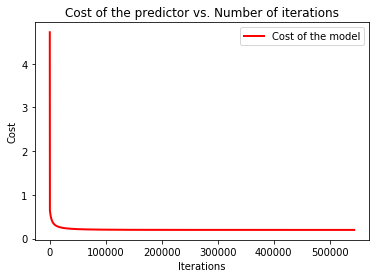

In [168]:
plt.plot(Jhist, color = 'r', linewidth = 2, label = 'Cost of the model')

plt.title('Cost of the predictor vs. Number of iterations')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

plt.show()

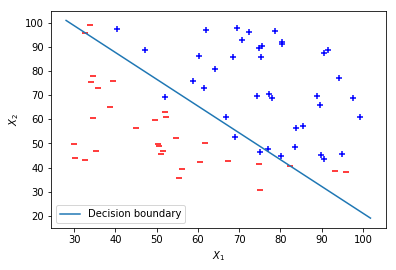

In [172]:
# Plotting decision boundary and training data

Xplot = np.array([[np.min(X[:,1])-2], [np.max(X[:,1])+2]])
yplot = (-1/Theta[2])*(Theta[0] + Theta[1] * Xplot)

plt.plot(Xplot, yplot, label = 'Decision boundary')

for i in range(ytrain.size):
    if ytrain[i] == 0:
        plt .scatter(Xtrain[i, 1], Xtrain[i, 2], marker = '_', color = 'r', s = 45)
    else:
        plt.scatter(Xtrain[i, 1], Xtrain[i, 2], marker = '+', color = 'b', s = 45)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()

plt.show()



In [178]:
print("""
Expected values of Theta

b = [-25.16127]
W = [[0.20623]
 [0.20147]]

""")
print("""
Learned values of Theta
b = {}
W = {}
""".format(Theta[0], Theta[1:]))



Expected values of Theta

b = [-25.16127]
W = [[0.20623]
 [0.20147]]



Learned values of Theta
b = [-23.80853659]
W = [[0.19990673]
 [0.1803831 ]]



In [188]:
## Predicting for test dataset

predictions = np.round(sigmoid(Xtest @ Theta))

## Comparing the predictions with actual results

print('Prediction \t Ytest')
for i in range(predictions.size):
    print('   {} \t\t  {}'.format(predictions[i,0], ytest[i,0]))

Prediction 	 Ytest
   1.0 		  1.0
   0.0 		  0.0
   1.0 		  1.0
   0.0 		  0.0
   1.0 		  1.0
   0.0 		  1.0
   0.0 		  1.0
   1.0 		  1.0
   1.0 		  1.0
   1.0 		  1.0
   0.0 		  1.0
   1.0 		  1.0
   1.0 		  1.0
   1.0 		  1.0
   0.0 		  0.0
   1.0 		  1.0
   1.0 		  1.0
   0.0 		  0.0
   1.0 		  1.0
   0.0 		  0.0
   1.0 		  1.0
   1.0 		  1.0
   1.0 		  1.0
   1.0 		  1.0
   1.0 		  0.0
   0.0 		  0.0
   0.0 		  0.0
   0.0 		  0.0
   1.0 		  1.0
   1.0 		  1.0


In [193]:
## Calculating accuracy of our model

p, r, f, s = precision_recall_fscore_support(ytest, predictions)

print("""Precision::\t{}
Recall::\t{}
F-Score::\t{}
Support::\t{}""".format(p, r, f, s))

print("Accuracy score::\t{}".format(accuracy_score(ytest, predictions)))

Precision::	[0.72727273 0.94736842]
Recall::	[0.88888889 0.85714286]
F-Score::	[0.8 0.9]
Support::	[ 9 21]
Accuracy score::	0.8666666666666667


``~Nikhil_Chigali``